## FoML Assignment-3

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Enter Your Name Here
myname = "Rohan B M" 
Roll_No = "BM21MTECH14003"

# Question No.5a - Pre-Processing the popular Lending Club dataset
#load the training dataset
df = pd.read_csv('loan_train.csv')

pd.set_option('display.max_columns', None)
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,573354,737474,10000,10000,9950.00000,36 months,7.51%,311.11,A,A4,15,10+ years,RENT,30000.0,Source Verified,10-Sep,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 08/30/10 > thank you<br/>,home_improvement,homeimproement,076xx,NJ,5.00,0,1-Feb,3,NaN,NaN,19,0,1450,1.20%,48,f,0.00,0.0,2247.210000,2235.98,1509.91,350.87,0.0,386.43,3.96,11-Mar,311.11,NaN,11-Jul,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,476321,603324,15000,15000,14800.00000,36 months,8.94%,476.58,A,A5,1400,1 year,RENT,147000.0,Not Verified,10-Jan,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 01/14/10 > Green city hous...,other,Green City,300xx,GA,3.47,0,Feb-97,0,NaN,NaN,6,0,4910,14%,17,f,0.00,0.0,15112.760000,14911.26,15000.00,112.76,0.0,0.00,0.00,10-Mar,15114.03,NaN,10-Feb,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,451484,556265,2000,2000,2000.00000,36 months,13.57%,67.94,C,C3,36000,4 years,OWN,36000.0,Not Verified,9-Oct,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,major_purchase,payoff w/in 2 years,310xx,GA,7.83,0,Mar-00,0,NaN,NaN,8,0,1790,34.40%,10,f,0.00,0.0,2354.966827,2354.97,2000.00,354.97,0.0,0.00,0.00,11-Dec,101.78,NaN,11-Dec,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1018129,1246557,35000,35000,33951.84413,60 months,20.89%,944.71,F,F1,553742017,10+ years,MORTGAGE,160000.0,Verified,11-Nov,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 11/10/11 > Consolidate all...,debt_consolidation,Loan I,488xx,MI,12.11,0,Jun-99,1,NaN,88.0,13,2,34165,91.40%,21,f,5355.36,5340.0,50974.920000,48442.03,29644.65,21330.27,0.0,0.00,0.00,16-May,944.71,16-Jun,16-May,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN

In [2]:
# Size of the dataset
df.shape

(24999, 111)

In [3]:
# target variable
df['loan_status'].value_counts()

Fully Paid     20827
Charged Off     3474
Current          698
Name: loan_status, dtype: int64

In [4]:
# Drop of unneccesary target attributes
df = df.loc[df['loan_status'].isin(['Fully Paid','Charged Off'])]
df['loan_status'].value_counts(normalize=False, dropna=False)

# Assigning valves to target attributes i.e., “Fully Paid” is assigned to +1 and “Charged off” assigned to -1
df['loan_status'] = df['loan_status'].apply(lambda x : +1 if x=='Fully Paid' else -1)
df['loan_status'].unique()

array([-1,  1], dtype=int64)

In [5]:
# Size of the dataset after removing unneccesary target attributes
df.shape

(24301, 111)

In [6]:
# Checking information of the raw dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24301 entries, 0 to 24998
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(14), object(23)
memory usage: 20.8+ MB


# Checking for Missing values in the data

In [7]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        17
tot_hi_cred_lim               24301
total_bal_ex_mort             24301
total_bc_limit                24301
total_il_high_credit_limit    24301
Length: 111, dtype: int64

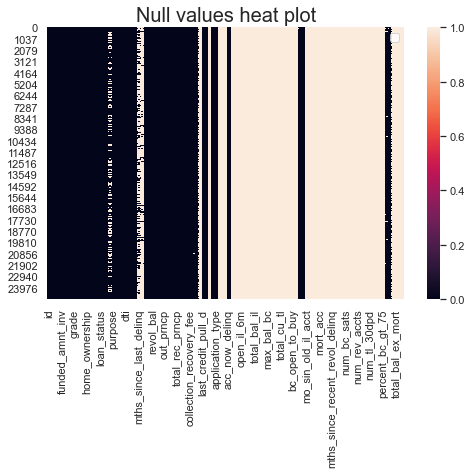

In [8]:
# Checking for null values using a heat map as a visualizing tool
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style('whitegrid')
sns.heatmap(df.isnull())
plt.title('Null values heat plot',fontdict={'fontsize': 20})
plt.legend(df.isnull())
plt.show()

In [9]:
# Total percentage of null values in the data
df.isnull().sum().sum()/(df.shape[0]*df.shape[1])

0.5129107132728383

In [10]:
# Creating a dataframe to display percentage of null values in each column
a = pd.DataFrame()
a['Percentage of null values']=['10% or less','20% or less','30% or less','40% or less','50% or less','60% or less','70% or less']

ten_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.1])
twenty_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.2])
thirty_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.3])
fourty_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.4])
fifty_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.5])
sixty_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.6])
seventy_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.7])


a['No.of columns'] = [ten_percent,twenty_percent,thirty_percent,fourty_percent,fifty_percent,sixty_percent,seventy_percent]
a

,Percentage of null values,No.of columns
0,10% or less,53
1,20% or less,53
2,30% or less,53
3,40% or less,54
4,50% or less,54
5,60% or less,54
6,70% or less,55


Here, Row 1 represents that there are 53 columns with less than 10% of null values in each column. Likewise, row 4 represents that there are 54 column with less than 40% of null valves in each column.

In [11]:
# Considering only those columns which have null values less than 40% in that particular column
df = df[df.columns[((df.isnull().sum())/len(df)) < 0.4]]
df.shape

(24301, 54)

By considering columns with less number of null values, Decrease total number of columns from 111 to 54.

In [12]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,573354,737474,10000,10000,9950.0,36 months,7.51%,311.11,A,A4,15,10+ years,RENT,30000.0,Source Verified,10-Sep,-1,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 08/30/10 > thank you<br/>,home_improvement,homeimproement,076xx,NJ,5.00,0,1-Feb,3,19,0,1450,1.20%,48,f,0.0,0.0,2247.210000,2235.98,1509.91,350.87,0.0,386.43,3.96,11-Mar,311.11,11-Jul,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,476321,603324,15000,15000,14800.0,36 months,8.94%,476.58,A,A5,1400,1 year,RENT,147000.0,Not Verified,10-Jan,1,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 01/14/10 > Green city hous...,other,Green City,300xx,GA,3.47,0,Feb-97,0,6,0,4910,14%,17,f,0.0,0.0,15112.760000,14911.26,15000.00,112.76,0.0,0.00,0.00,10-Mar,15114.03,10-Feb,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,451484,556265,2000,2000,2000.0,36 months,13.57%,67.94,C,C3,36000,4 years,OWN,36000.0,Not Verified,9-Oct,1,n,https://lendingclub.com/browse/loanDetail.acti...,,major_purchase,payoff w/in 2 years,310xx,GA,7.83,0,Mar-00,0,8,0,1790,34.40%,10,f,0.0,0.0,2354.966827,2354.97,2000.00,354.97,0.0,0.00,0.00,11-Dec,101.78,11-Dec,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,800018,1005270,14000,14000,14000.0,60 months,17.49%,351.64,D,D5,old palm inc,5 years,MORTGAGE,50000.0,Not Verified,11-Jul,1,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 06/29/11 > thanks for the ...,debt_consolidation,save %,334xx,FL,21.24,1,4-Jun,1,9,1,553,9.40%,27,f,0.0,0.0,20804.230020,20804.23,14000.00,6804.23,0.0,0.00,0.00,15-Sep,3943.27,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,471391,595223,12000,12000,11900.0,36 months,8.94%,381.26,A,A5,Brocade Communications,7 years,MORTGAGE,294000.0,Not Verified,9-Dec,1,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,Invest in Lending Club Notes,939xx,CA,0.50,0,Aug-93,0,11,0,5306,2.80%,21,f,0.0,0.0,12344.811770,12241.94,12000.00,344.81,0.0,0.00,0.00,10-May,11204.30,10-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


# Understanding  the features

In [13]:
# Checking columns that are of dtype 'object'
df.columns[df.dtypes == 'object']

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type'],
      dtype='object')

In [14]:
# Instead of checking every column of 54 columns, here running a for loop on top of 'object' columns and take a decison based on the output of this cell.
for i in df.columns[df.dtypes == 'object']:
    print(df[i].value_counts())
    print('************************')

 36 months    18203
 60 months     6098
Name: term, dtype: int64
************************
10.99%    575
7.51%     496
11.49%    479
7.88%     476
13.49%    470
         ... 
24.40%      1
21.21%      1
18.36%      1
15.83%      1
16.96%      1
Name: int_rate, Length: 361, dtype: int64
************************
B    7290
A    6270
C    4929
D    3295
E    1693
F     626
G     198
Name: grade, dtype: int64
************************
A4    1824
A5    1741
B3    1716
B5    1677
B4    1532
C1    1290
B2    1259
C2    1217
A3    1107
B1    1106
C3     930
A2     912
D2     843
C4     754
C5     738
D3     715
A1     686
D1     599
D4     580
D5     558
E1     465
E2     387
E3     333
E4     274
E5     234
F1     203
F2     151
F3     106
F4      97
F5      69
G1      60
G2      49
G4      38
G3      32
G5      19
Name: sub_grade, dtype: int64
************************
Bank of America         107
IBM                      65
AT&T                     57
Kaiser Permanente        56
Lockheed Martin 

In [15]:
# After observing the object attributes, I am dropping columns which are not important and which doesn't add value to our use case.

df.drop(['emp_title','pymnt_plan','url','desc','title', 'zip_code', 'addr_state', 'initial_list_status','application_type',],axis=1,inplace=True)

In [16]:
# Checking some numerical columns
col = ['acc_now_delinq','chargeoff_within_12_mths','collections_12_mths_ex_med','delinq_amnt','policy_code','tax_liens']
for i in col:
    print(df[i].value_counts())
    print('************************')

0    24301
Name: acc_now_delinq, dtype: int64
************************
0.0    24272
Name: chargeoff_within_12_mths, dtype: int64
************************
0.0    24272
Name: collections_12_mths_ex_med, dtype: int64
************************
0    24301
Name: delinq_amnt, dtype: int64
************************
1    24301
Name: policy_code, dtype: int64
************************
0.0    24284
Name: tax_liens, dtype: int64
************************


In [17]:
# There are also few not so useful numerical columns.We are dropping these numerical columns after examining them. 

df.drop(['id','member_id','issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d','acc_now_delinq','chargeoff_within_12_mths','sub_grade','revol_util',
         'collections_12_mths_ex_med','delinq_amnt','policy_code','tax_liens','out_prncp','out_prncp_inv'],axis=1,inplace=True)

In [18]:
df.shape

(24301, 29)

In [19]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
0,10000,10000,9950.0,36 months,7.51%,311.11,A,10+ years,RENT,30000.0,Source Verified,-1,home_improvement,5.00,0,3,19,0,1450,48,2247.210000,2235.98,1509.91,350.87,0.0,386.43,3.96,311.11,0.0
1,15000,15000,14800.0,36 months,8.94%,476.58,A,1 year,RENT,147000.0,Not Verified,1,other,3.47,0,0,6,0,4910,17,15112.760000,14911.26,15000.00,112.76,0.0,0.00,0.00,15114.03,0.0
2,2000,2000,2000.0,36 months,13.57%,67.94,C,4 years,OWN,36000.0,Not Verified,1,major_purchase,7.83,0,0,8,0,1790,10,2354.966827,2354.97,2000.00,354.97,0.0,0.00,0.00,101.78,0.0
4,14000,14000,14000.0,60 months,17.49%,351.64,D,5 years,MORTGAGE,50000.0,Not Verified,1,debt_consolidation,21.24,1,1,9,1,553,27,20804.230020,20804.23,14000.00,6804.23,0.0,0.00,0.00,3943.27,0.0
5,12000,12000,11900.0,36 months,8.94%,381.26,A,7 years,MORTGAGE,294000.0,Not Verified,1,other,0.50,0,0,11,0,5306,21,12344.811770,12241.94,12000.00,344.81,0.0,0.00,0.00,11204.30,0.0


# Transforming categorical data into binary values

In [20]:
# Label encoding on grade and term column
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.grade)
df['grade']=le.transform(df.grade)

le.fit(df.term)
df['term']=le.transform(df.term)

In [21]:
# Converting int_rate and emp-length to numerical columns
df.int_rate = df.int_rate.apply(lambda x:x[:2])
df.int_rate = df.int_rate.astype('float')

In [22]:
# Label encoding on categorical column
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.home_ownership)
df['home_ownership']=le.transform(df.home_ownership)

le.fit(df.verification_status)
df['verification_status']=le.transform(df.verification_status)

le.fit(df.purpose)
df['purpose']=le.transform(df.purpose)

In [23]:
# Replace the missing value with median for the 'pub_rec_bankruptcies' attribute
df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].median(),inplace=True)
df['pub_rec_bankruptcies'].unique()

array([0., 1., 2.])

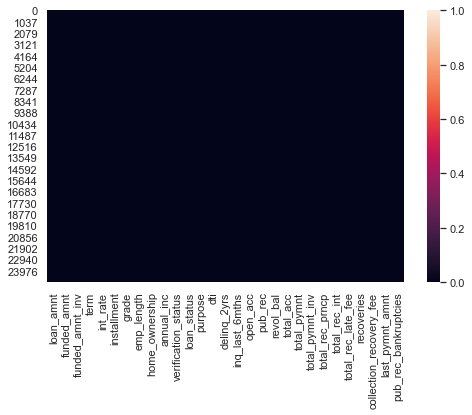

In [24]:
# Checking for null values in the updated dataframe
sns.set(rc={'figure.figsize':(8,5)})
sns.heatmap(df.isnull())
plt.show()

In [25]:
# verifing with null values
df.isnull().sum()

loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
emp_length                 40
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
purpose                     0
dti                         0
delinq_2yrs                 0
inq_last_6mths              0
open_acc                    0
pub_rec                     0
revol_bal                   0
total_acc                   0
total_pymnt                 0
total_pymnt_inv             0
total_rec_prncp             0
total_rec_int               0
total_rec_late_fee          0
recoveries                  0
collection_recovery_fee     0
last_pymnt_amnt             0
pub_rec_bankruptcies        0
dtype: int64

In [26]:
# seperating null values by assigning a random string
df['emp_length'].fillna('5000',inplace=True) 
# Filling less than one year as 0 years of experience
df.emp_length.replace({'10+ years':'10 years','< 1 year':'0 years'},inplace=True) 
# Converting it's dtype to float
df.emp_length = df.emp_length.apply(lambda x:x[:2])
df.emp_length = df.emp_length.astype('float')

In [27]:
tar_col=df['loan_status']
df.drop(['loan_status'],axis=1,inplace=True)
df=df.join(tar_col)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24301 entries, 0 to 24998
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                24301 non-null  int64  
 1   funded_amnt              24301 non-null  int64  
 2   funded_amnt_inv          24301 non-null  float64
 3   term                     24301 non-null  int32  
 4   int_rate                 24301 non-null  float64
 5   installment              24301 non-null  float64
 6   grade                    24301 non-null  int32  
 7   emp_length               24301 non-null  float64
 8   home_ownership           24301 non-null  int32  
 9   annual_inc               24301 non-null  float64
 10  verification_status      24301 non-null  int32  
 11  purpose                  24301 non-null  int32  
 12  dti                      24301 non-null  float64
 13  delinq_2yrs              24301 non-null  int64  
 14  inq_last_6mths        

In [28]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,loan_status
0,10000,10000,9950.0,0,7.0,311.11,0,10.0,3,30000.0,1,4,5.00,0,3,19,0,1450,48,2247.210000,2235.98,1509.91,350.87,0.0,386.43,3.96,311.11,0.0,-1
1,15000,15000,14800.0,0,8.0,476.58,0,1.0,3,147000.0,0,9,3.47,0,0,6,0,4910,17,15112.760000,14911.26,15000.00,112.76,0.0,0.00,0.00,15114.03,0.0,1
2,2000,2000,2000.0,0,13.0,67.94,2,4.0,2,36000.0,0,6,7.83,0,0,8,0,1790,10,2354.966827,2354.97,2000.00,354.97,0.0,0.00,0.00,101.78,0.0,1
4,14000,14000,14000.0,1,17.0,351.64,3,5.0,0,50000.0,0,2,21.24,1,1,9,1,553,27,20804.230020,20804.23,14000.00,6804.23,0.0,0.00,0.00,3943.27,0.0,1
5,12000,12000,11900.0,0,8.0,381.26,0,7.0,0,294000.0,0,9,0.50,0,0,11,0,5306,21,12344.811770,12241.94,12000.00,344.81,0.0,0.00,0.00,11204.30,0.0,1


In [29]:
df.shape

(24301, 29)

Finally we preprocessed the train dataset for future classification. Now, we can apply same preprocessed steps on test dataset

In [30]:
#load the test dataset
df1 = pd.read_csv('loan_test.csv')

# Deleting columns which have less than 40% null valves
df1 = df1[df1.columns[((df1.isnull().sum())/len(df1)) < 0.4]]
df1.shape

# Target variable
df1 = df1.loc[df1['loan_status'].isin(['Fully Paid','Charged Off'])]
df1['loan_status'].value_counts(normalize=False, dropna=False)
df1['loan_status'] = df1['loan_status'].apply(lambda x : +1 if x=='Fully Paid' else -1)

# Droping unnecessary features
df1.drop(['emp_title','pymnt_plan','url','desc','title', 'zip_code', 'addr_state', 'initial_list_status','application_type',],axis=1,inplace=True)

df1.drop(['id','member_id','issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d','acc_now_delinq','chargeoff_within_12_mths','sub_grade','revol_util',
         'collections_12_mths_ex_med','delinq_amnt','policy_code','tax_liens','out_prncp','out_prncp_inv'],axis=1,inplace=True)

In [31]:
# Converting catogarical data to binary valve

# Label encoding 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df1.grade)
df1['grade']=le.transform(df1.grade)

le.fit(df1.term)
df1['term']=le.transform(df1.term)

le.fit(df1.home_ownership)
df1['home_ownership']=le.transform(df1.home_ownership)

le.fit(df1.verification_status)
df1['verification_status']=le.transform(df1.verification_status)

le.fit(df1.purpose)
df1['purpose']=le.transform(df1.purpose)

# Converting int_rate and emp-length to numerical columns
df1.int_rate = df1.int_rate.apply(lambda x:x[:2])
df1.int_rate = df1.int_rate.astype('float')

# Replace the missing value with median for the 'pub_rec_bankruptcies' attribute
df1['pub_rec_bankruptcies'].fillna(df1['pub_rec_bankruptcies'].median(),inplace=True)


In [32]:
# seperating null values by assigning a random string
df1['emp_length'].fillna('5000',inplace=True) 
# Filling less than one year as 0 years of experience
df1.emp_length.replace({'10+ years':'10 years','< 1 year':'0 years'},inplace=True) 
# Converting it's dtype to float
df1.emp_length = df1.emp_length.apply(lambda x:x[:2])
df1.emp_length = df1.emp_length.astype('float')

# Shifting target column to last column
tar_col=df1['loan_status']
df1.drop(['loan_status'],axis=1,inplace=True)
df1=df1.join(tar_col)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14276 entries, 0 to 14717
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                14276 non-null  int64  
 1   funded_amnt              14276 non-null  int64  
 2   funded_amnt_inv          14276 non-null  float64
 3   term                     14276 non-null  int32  
 4   int_rate                 14276 non-null  float64
 5   installment              14276 non-null  float64
 6   grade                    14276 non-null  int32  
 7   emp_length               14276 non-null  float64
 8   home_ownership           14276 non-null  int32  
 9   annual_inc               14276 non-null  float64
 10  verification_status      14276 non-null  int32  
 11  purpose                  14276 non-null  int32  
 12  dti                      14276 non-null  float64
 13  delinq_2yrs              14276 non-null  int64  
 14  inq_last_6mths        

In [33]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,loan_status
0,4200,4200,4200.0,0,6.0,128.96,0,6.0,4,69000.0,0,0,11.08,0,0,10,0,4544,15,4642.374867,4642.37,4200.00,442.37,0.00000,0.0,0.000,132.82,0.0,1
1,1325,1325,1325.0,0,13.0,44.96,2,0.0,4,24000.0,1,8,3.80,0,0,3,0,2158,3,1476.640000,1476.64,1145.61,287.60,14.93661,28.5,0.285,44.96,0.0,-1
2,10000,10000,9975.0,0,8.0,317.72,0,4.0,0,75000.0,0,2,12.64,0,1,10,0,36161,45,10287.347790,10261.63,10000.00,287.35,0.00000,0.0,0.000,9337.10,0.0,1
3,6000,6000,6000.0,1,16.0,147.48,3,10.0,4,60000.0,1,2,13.06,0,0,20,0,13961,24,8848.343924,8848.34,6000.00,2848.34,0.00000,0.0,0.000,147.02,0.0,1
4,25000,25000,25000.0,0,15.0,869.21,3,4.0,4,135000.0,1,2,15.49,0,2,20,0,21090,44,31293.587380,31293.59,25000.00,6293.59,0.00000,0.0,0.000,960.31,0.0,1


In [34]:
df1.shape

(14276, 29)

Done with pre-processing of the data now we have build the model and classify the dataset

In [35]:
# Question No.5b - Apply gradient boosting algorithmn for the data
import sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

# split the data into features and label
x_train=df.iloc[:,:28]
y_train=df.iloc[:,28:]
x_test=df1.iloc[:,:28]
y_test=df1.iloc[:,28:]

In [36]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings("ignore")

In [37]:
GB_model = GradientBoostingClassifier(n_estimators=20,learning_rate=0.1, max_features=2,max_depth=6,min_samples_leaf=30, random_state=0)
GB_model.fit(x_train, y_train)
predicted = GB_model.predict(x_test)
print('Accuracy: ',accuracy_score(y_test, predicted)*100)

Accuracy:  97.07901372933595


In [38]:
# Tuning hyperparameters to find the best gradient boosting model.  
from sklearn.model_selection import GridSearchCV

para_1 = {'n_estimators':range(20,51,10), 'learning_rate':[0.01,0.1,1,10]}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(),param_grid = para_1, scoring = 'roc_auc',n_jobs=4, cv=5)
gsearch1.fit(x_train,y_train)
gsearch1.best_params_, gsearch1.best_score_
print(gsearch1.best_params_)

para_2 = {'max_depth':range(5,16,5), 'min_samples_leaf':range(30,71,10)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, max_features=6, subsample=0.8, random_state=0), param_grid = para_2, scoring='roc_auc',n_jobs=4, cv=5)
gsearch2.fit(x_train,y_train)
gsearch2.best_params_, gsearch2.best_score_
print(gsearch2.best_params_)

{'learning_rate': 0.1, 'n_estimators': 50}
{'max_depth': 15, 'min_samples_leaf': 30}


Accuracy:  99.55169515270383
Classification Report
              precision    recall  f1-score   support

          -1       1.00      0.97      0.98      2153
           1       1.00      1.00      1.00     12123

    accuracy                           1.00     14276
   macro avg       1.00      0.99      0.99     14276
weighted avg       1.00      1.00      1.00     14276



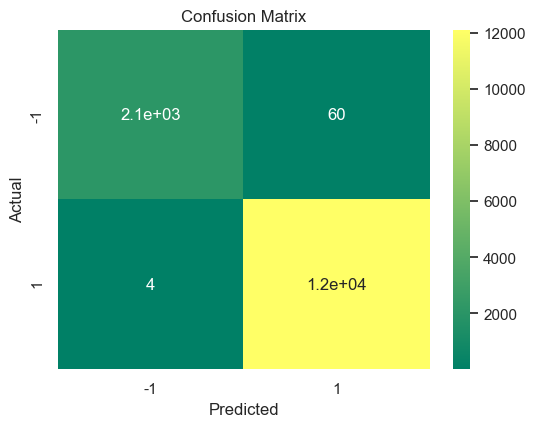

In [39]:
GB_bestmodel = GradientBoostingClassifier(n_estimators=50,learning_rate=0.1, max_features=6,max_depth=15,min_samples_leaf=30, random_state=0)
GB_bestmodel.fit(x_train, y_train)
predicted = GB_bestmodel.predict(x_test)
print('Accuracy: ',accuracy_score(y_test, predicted)*100)
print('Classification Report')
print(classification_report(y_test, predicted))

#confuison matrix
from sklearn.metrics import confusion_matrix
import matplotlib
sns.set(rc={'figure.figsize':(6,4.5)})
matplotlib.rcParams["figure.dpi"] = 100
cm = confusion_matrix(y_test,predicted) 
sns.heatmap(cm, annot=True,cmap="summer");
ax= plt.subplot()
ax.xaxis.set_ticklabels(['-1', '1']); ax.yaxis.set_ticklabels(['-1', '1']);
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Question: What hyperparameters led to highest accuracy

Answer: parameters such as n_estimators=50,learning_rate=0.1, max_features=6,max_depth=15 and min_samples_leaf=30 will give the highest accuracy

In [40]:
# Effect of increasing the number of trees in the classifier
for number_trees in [10,50,100,200,500]:
    GB_model = GradientBoostingClassifier(n_estimators= number_trees , learning_rate=0.1 , max_features=6,max_depth=15).fit(x_train, y_train)
    print(f'Number of trees: {number_trees} ')
    print(f'Accuracy: {GB_model.score(x_test,y_test)*100}\n')

Number of trees: 10 
Accuracy: 99.1734379377977

Number of trees: 50 
Accuracy: 99.51667133650882

Number of trees: 100 
Accuracy: 99.60773325861587

Number of trees: 200 
Accuracy: 99.56570467918185

Number of trees: 500 
Accuracy: 99.67778089100588



Answer: Gradient boosting model which contains 500 decision tree got the highest accuracy of 99.67

Number of tree: 1 --> Test error: 0.15080000000000005
Number of tree: 11 --> Test error: 0.009700000000000042
Number of tree: 21 --> Test error: 0.006199999999999983
Number of tree: 31 --> Test error: 0.0042999999999999705
Number of tree: 41 --> Test error: 0.0038000000000000256
Number of tree: 51 --> Test error: 0.0036000000000000476
Number of tree: 61 --> Test error: 0.0036000000000000476
Number of tree: 71 --> Test error: 0.0031999999999999806
[0.15080000000000005, 0.009700000000000042, 0.006199999999999983, 0.0042999999999999705, 0.0038000000000000256, 0.0036000000000000476, 0.0036000000000000476, 0.0031999999999999806]
[1, 11, 21, 31, 41, 51, 61, 71]


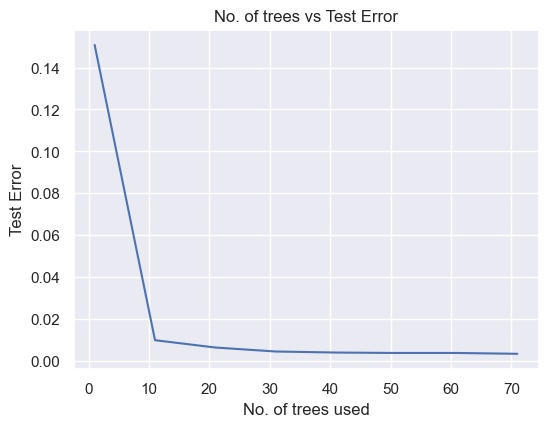

In [45]:
# Graph of test error v/s number of trees 
tree=[]
error =[]
for i in range(1,75,10):
    GB = GradientBoostingClassifier(learning_rate=0.1,n_estimators= i,max_depth=15,min_samples_split=60,min_samples_leaf=100, random_state=10)
    GB.fit(x_train,y_train)
    YPred=GB.predict(x_test)
    Accuracy=round(accuracy_score(y_test,YPred),4)
    error.append(1-Accuracy)
    tree.append(i)
    print(f'Number of tree: {i} --> Test error: {1-Accuracy}')
print(error)
print(tree)
plt.plot(tree, error)
plt.xlabel('No. of trees used')
plt.ylabel('Test Error')
plt.title('No. of trees vs Test Error')
plt.show()

# Comparing final best performance result against a simple decision tree

Accuracy: 99.66377136452788


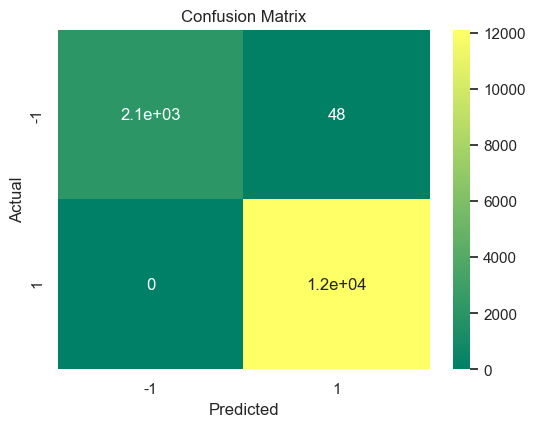

Classification Report
              precision    recall  f1-score   support

          -1       1.00      0.98      0.99      2153
           1       1.00      1.00      1.00     12123

    accuracy                           1.00     14276
   macro avg       1.00      0.99      0.99     14276
weighted avg       1.00      1.00      1.00     14276



In [42]:
GB_finalmodel = GradientBoostingClassifier(n_estimators= 500 , learning_rate=0.1 , max_features=6,max_depth=15).fit(x_train, y_train)
GB_finalPred = GB_finalmodel.predict(x_test)
print(f'Accuracy: {GB_finalmodel.score(x_test,y_test)*100}')

cm1 = confusion_matrix(y_test,GB_finalPred) 
sns.heatmap(cm1, annot=True,cmap="summer"); 
ax= plt.subplot()
ax.xaxis.set_ticklabels(['-1', '1']); ax.yaxis.set_ticklabels(['-1', '1']);
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print('Classification Report')
print(classification_report(y_test, GB_finalPred))

Accuracy:  99.66377136452788


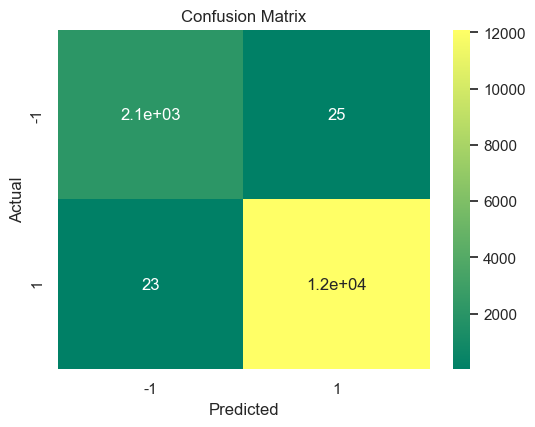

Classification Report
              precision    recall  f1-score   support

          -1       0.99      0.99      0.99      2153
           1       1.00      1.00      1.00     12123

    accuracy                           1.00     14276
   macro avg       0.99      0.99      0.99     14276
weighted avg       1.00      1.00      1.00     14276



In [43]:
# Implementing simple decision tree model
DecisionTree = DecisionTreeClassifier(criterion='entropy')
DecisionTree.fit(x_train, y_train)
Predict = DecisionTree.predict(x_test)

print('Accuracy: ',accuracy_score(y_test, Predict)*100)

cm2 = confusion_matrix(y_test,Predict)
sns.heatmap(cm2, annot=True,cmap="summer"); 
ax= plt.subplot()
ax.xaxis.set_ticklabels(['-1', '1']); ax.yaxis.set_ticklabels(['-1', '1']);
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print('Classification Report')
print(classification_report(y_test, Predict))

On comparing final gradient boosting model and simple decision tree, Precision valve is higher in gradient boosting and in case of decision tree we can observe that recall valve is increased but accuracy is almost the same